# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E News Express is an online news portal allowing users to subscribe in order to gain access.  E news is tyying to expand business by getting new subscribers.  E News Express would like to analyse the way in which different users (including those who have different preferred languages) interact with the website to better understand how to improve their landing page to get more conversion rates.  The executives of E News Express believes there is a decline in the number of subscribes compared to last year, and that this could be because of the landing page is not designed to keep used on the page long enough for them to decide if to subscribe.  

The design team created a new landing page which they believe is more relavent and a has more attractive otuline.  E News Newspaper would like to determine if the new landing page is better at getting subscribers than the old landing page.

To determine this an experiment was conducted with 100 randomly selected users who are divided into 2 groups, Control and Treatment.  The control group was given the old landing page and the treatment group was given the new landing page.  The users were monitored and data collected on their interactions with the landing pages.  

The objectives is to determine if there is enough statistical evidence that the new landing page is better at getting subscribers than the old landing page (at a 0.05% level of significance).  This is done in the following steps:

1.  Determine if users spend more time in the new landing page than in the old landing page
1.  Determine of the new landing page has a higher conversion rate than the old landing page
1.  Determine if there is a relationship between the converted status and preferred language of the user
1.  Determine how the different preferred languages affect how long the user stays on the webpage.

## Import all the necessary libraries

In [2]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.


# Command to display values up to 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x) 

# Command to prevent the printing of warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Data into a DataFrame

In [3]:
# importing the dataset in csv format
df = pd.read_csv("abtest.csv")

# making a copy of the data 
data = df.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# checking the first 5 rows of the copy of the dataset to ensure it was copied properly
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# checking the last 5 rows of the data
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [7]:
df.dtypes

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

In [5]:
# checking the shape of the data
df.shape

(100, 6)

#### Observations:

*  There are 100 rows and 6 columns in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
*  There are 2 numerical values and 4 categorical variables
*  user_id and time_spent_on_the_page are numerical variables 
*  group, landing_page, converted, language_preferred are categorical variables   

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations

* There are 2 unique groups in the dataset.
*  There are 2 unique landing pages in the dataset.
*  The mean time spent on a the landing page is 5.3778 minutes.  The minimum and maximum time spent of the landing page is 0.19 minutes and 10.71 minutes respectively.
*  There are 2 unique values in the converted variable.  Yes occurs the most with 54 rows.
*  There are 3 unique languages in the data set.  Spanish is the most frequent.

In [8]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations
* There are no null values

In [9]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations
* There are no na values in the dataset

In [10]:
df.duplicated().sum()

0

#### Observations
* There are no duplicated values in the dataset

### Univariate Analysis

In [11]:
# Examining the variables
df["group"].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

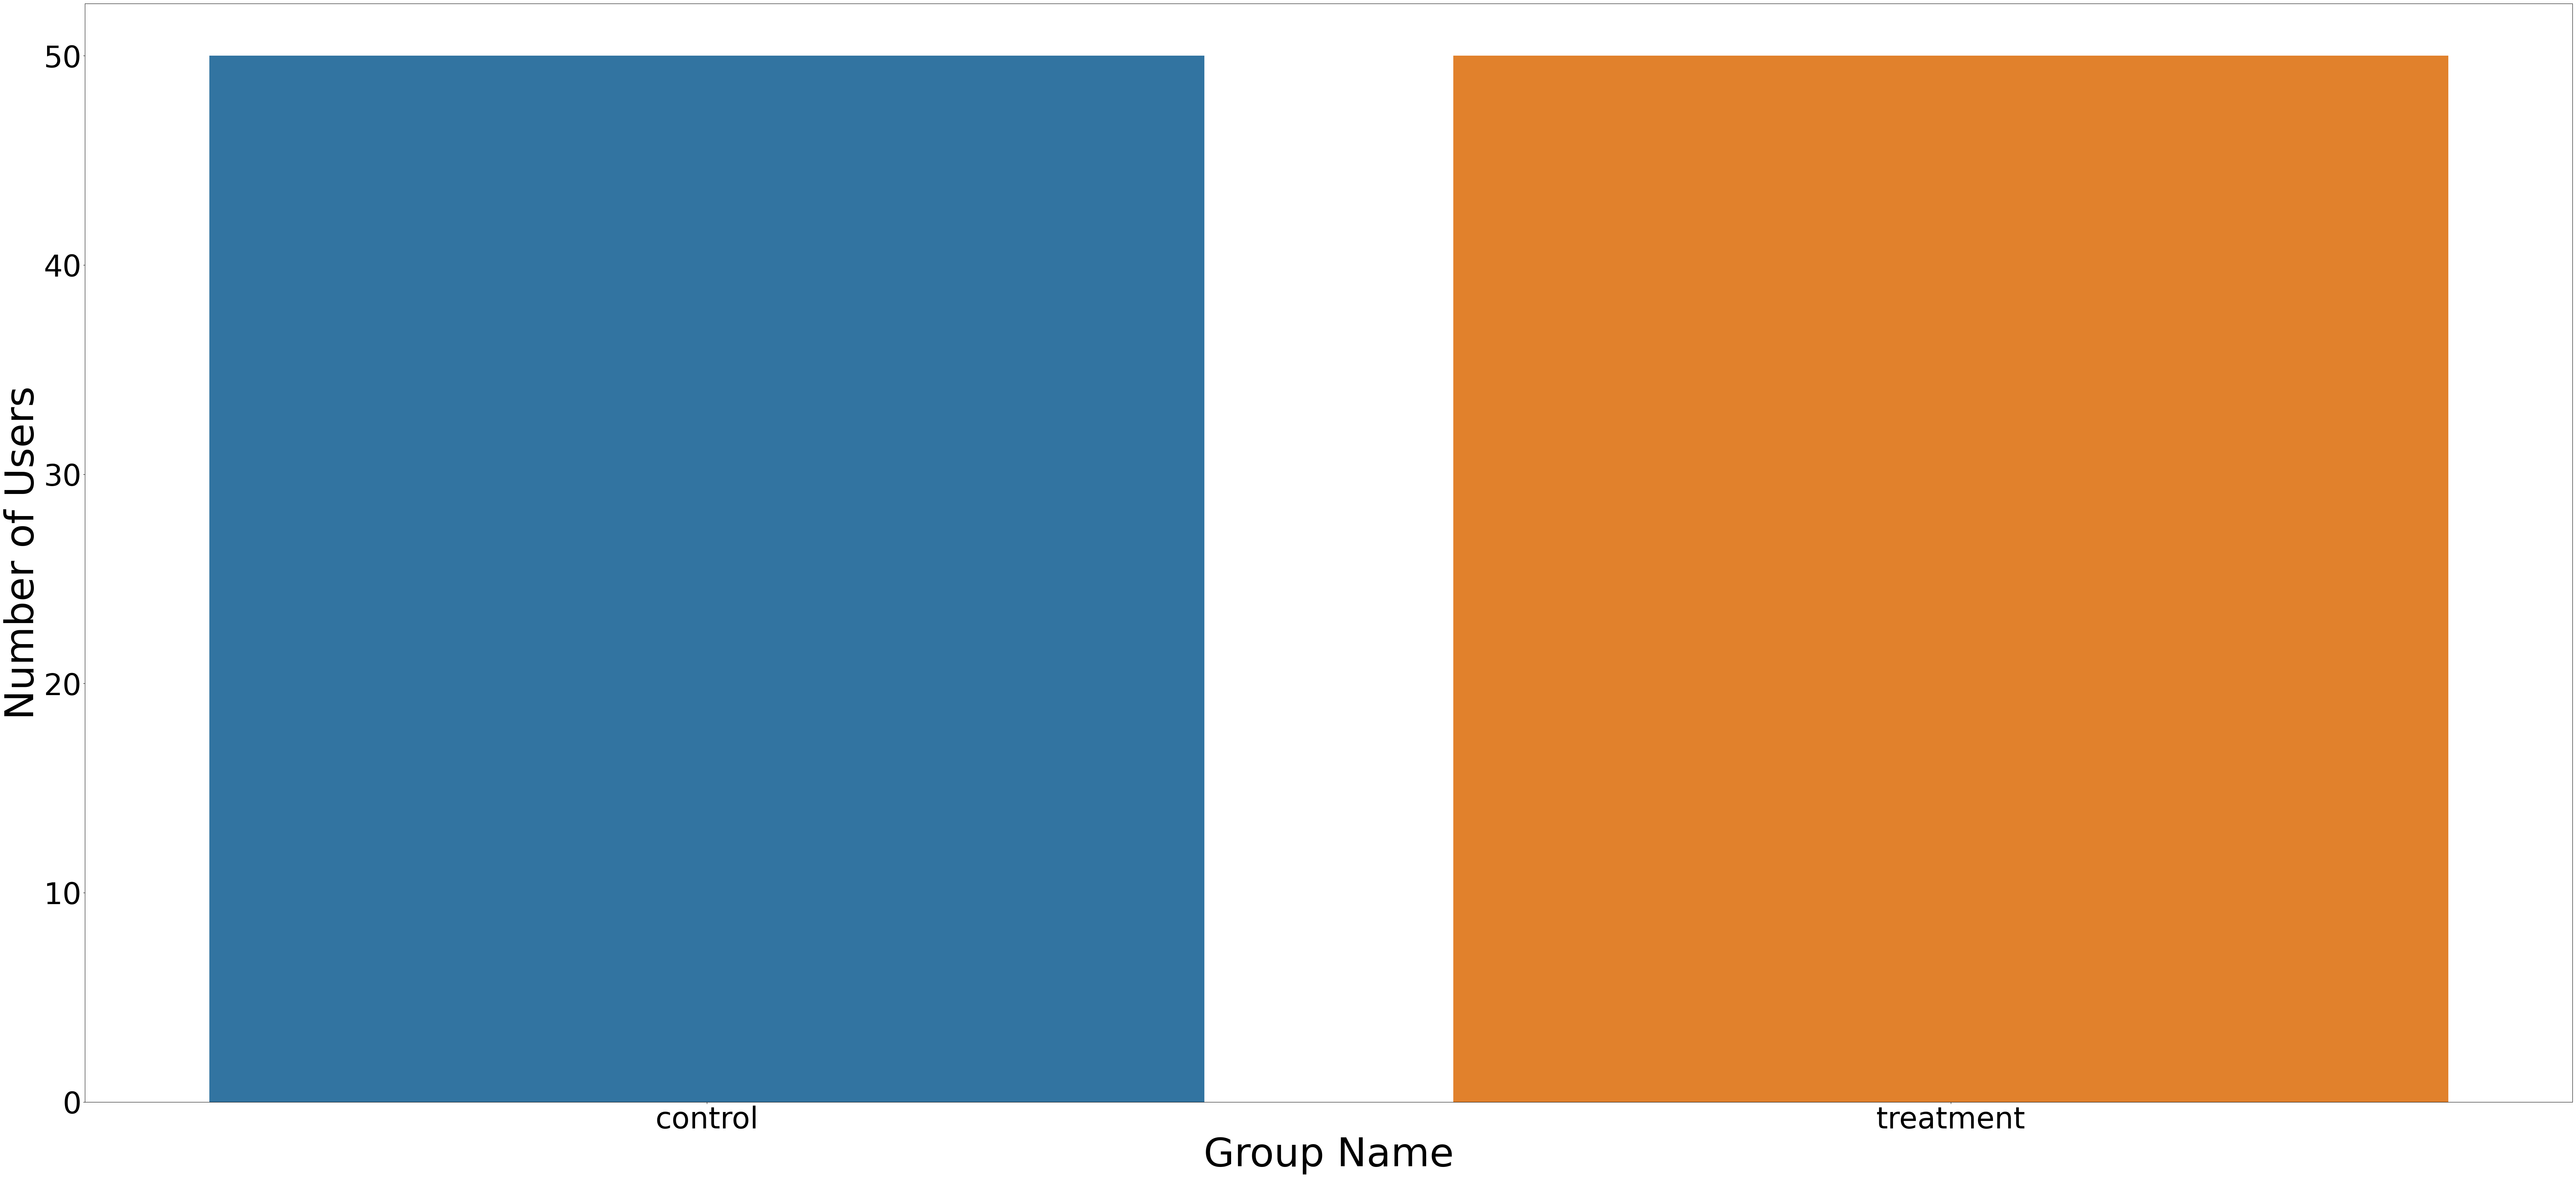

In [12]:
plt.figure(figsize=(90,40))
sns.countplot(data=df, x='group');
plt.xlabel("Group Name",fontsize=80)
plt.ylabel("Number of Users", fontsize=80)
plt.xticks(fontsize = 60);
plt.yticks(fontsize = 60);

#### Observations
*  Confirming there are 2 groups, control and treatment, with 50 users in each group 

In [13]:
df["landing_page"].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

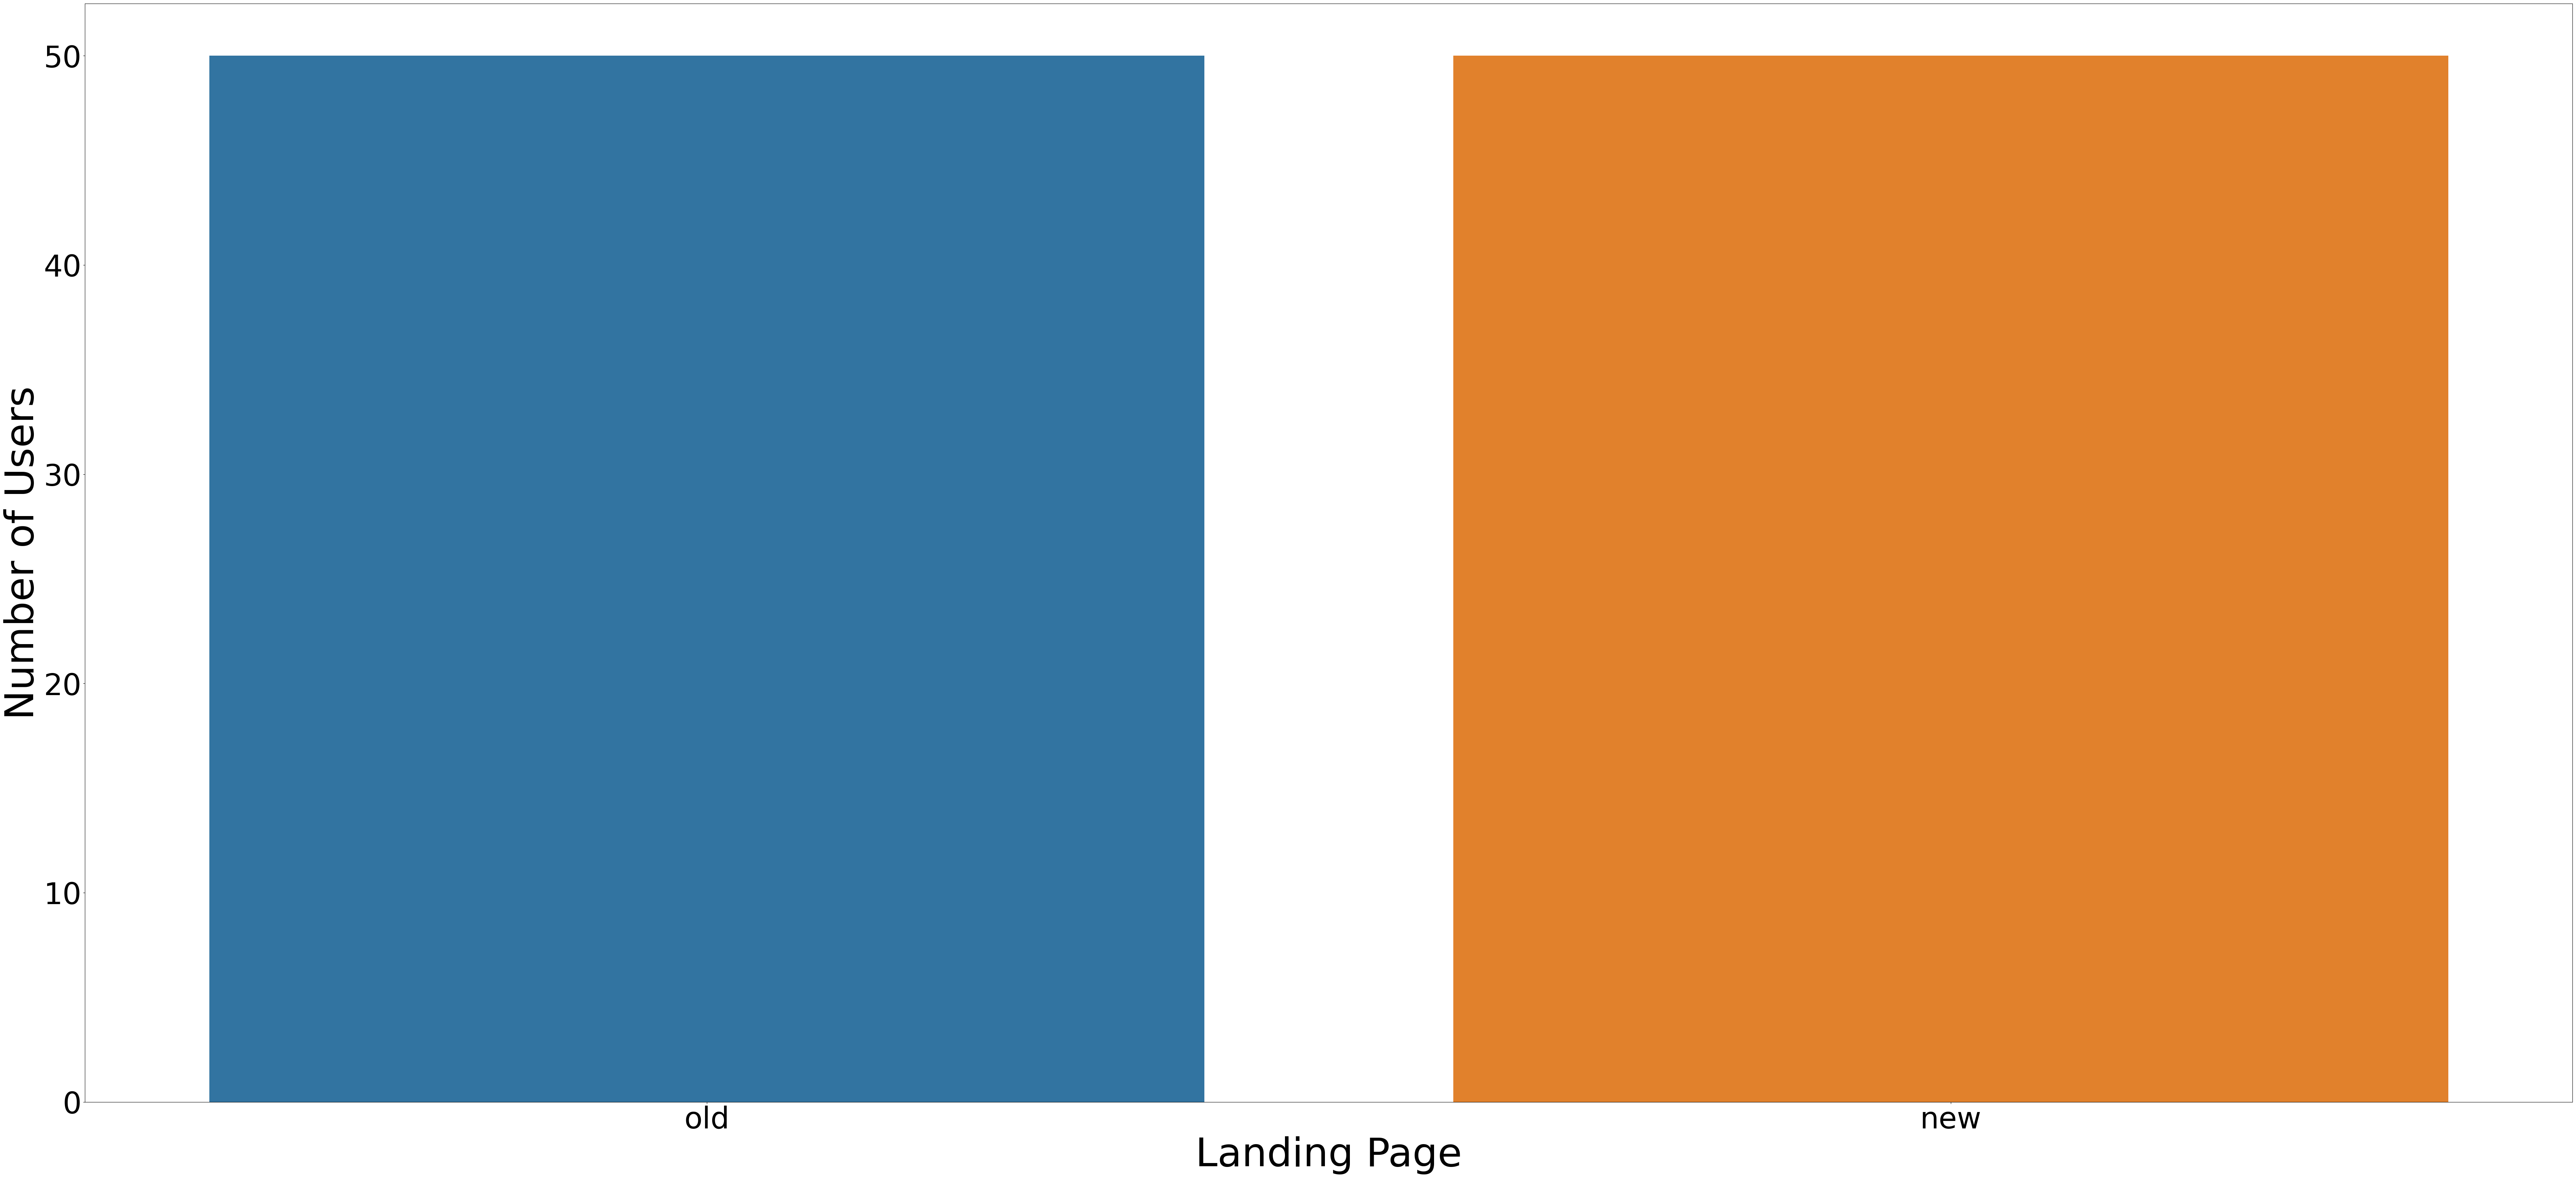

In [14]:
plt.figure(figsize=(90,40))
sns.countplot(data=df, x='landing_page');
plt.xlabel("Landing Page",fontsize=80)
plt.ylabel("Number of Users", fontsize=80)
plt.xticks(fontsize = 60);
plt.yticks(fontsize = 60);

#### Observations
* Confirming there are 2 webpages, old and new, with 50 users in each page

In [15]:
df["converted"].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

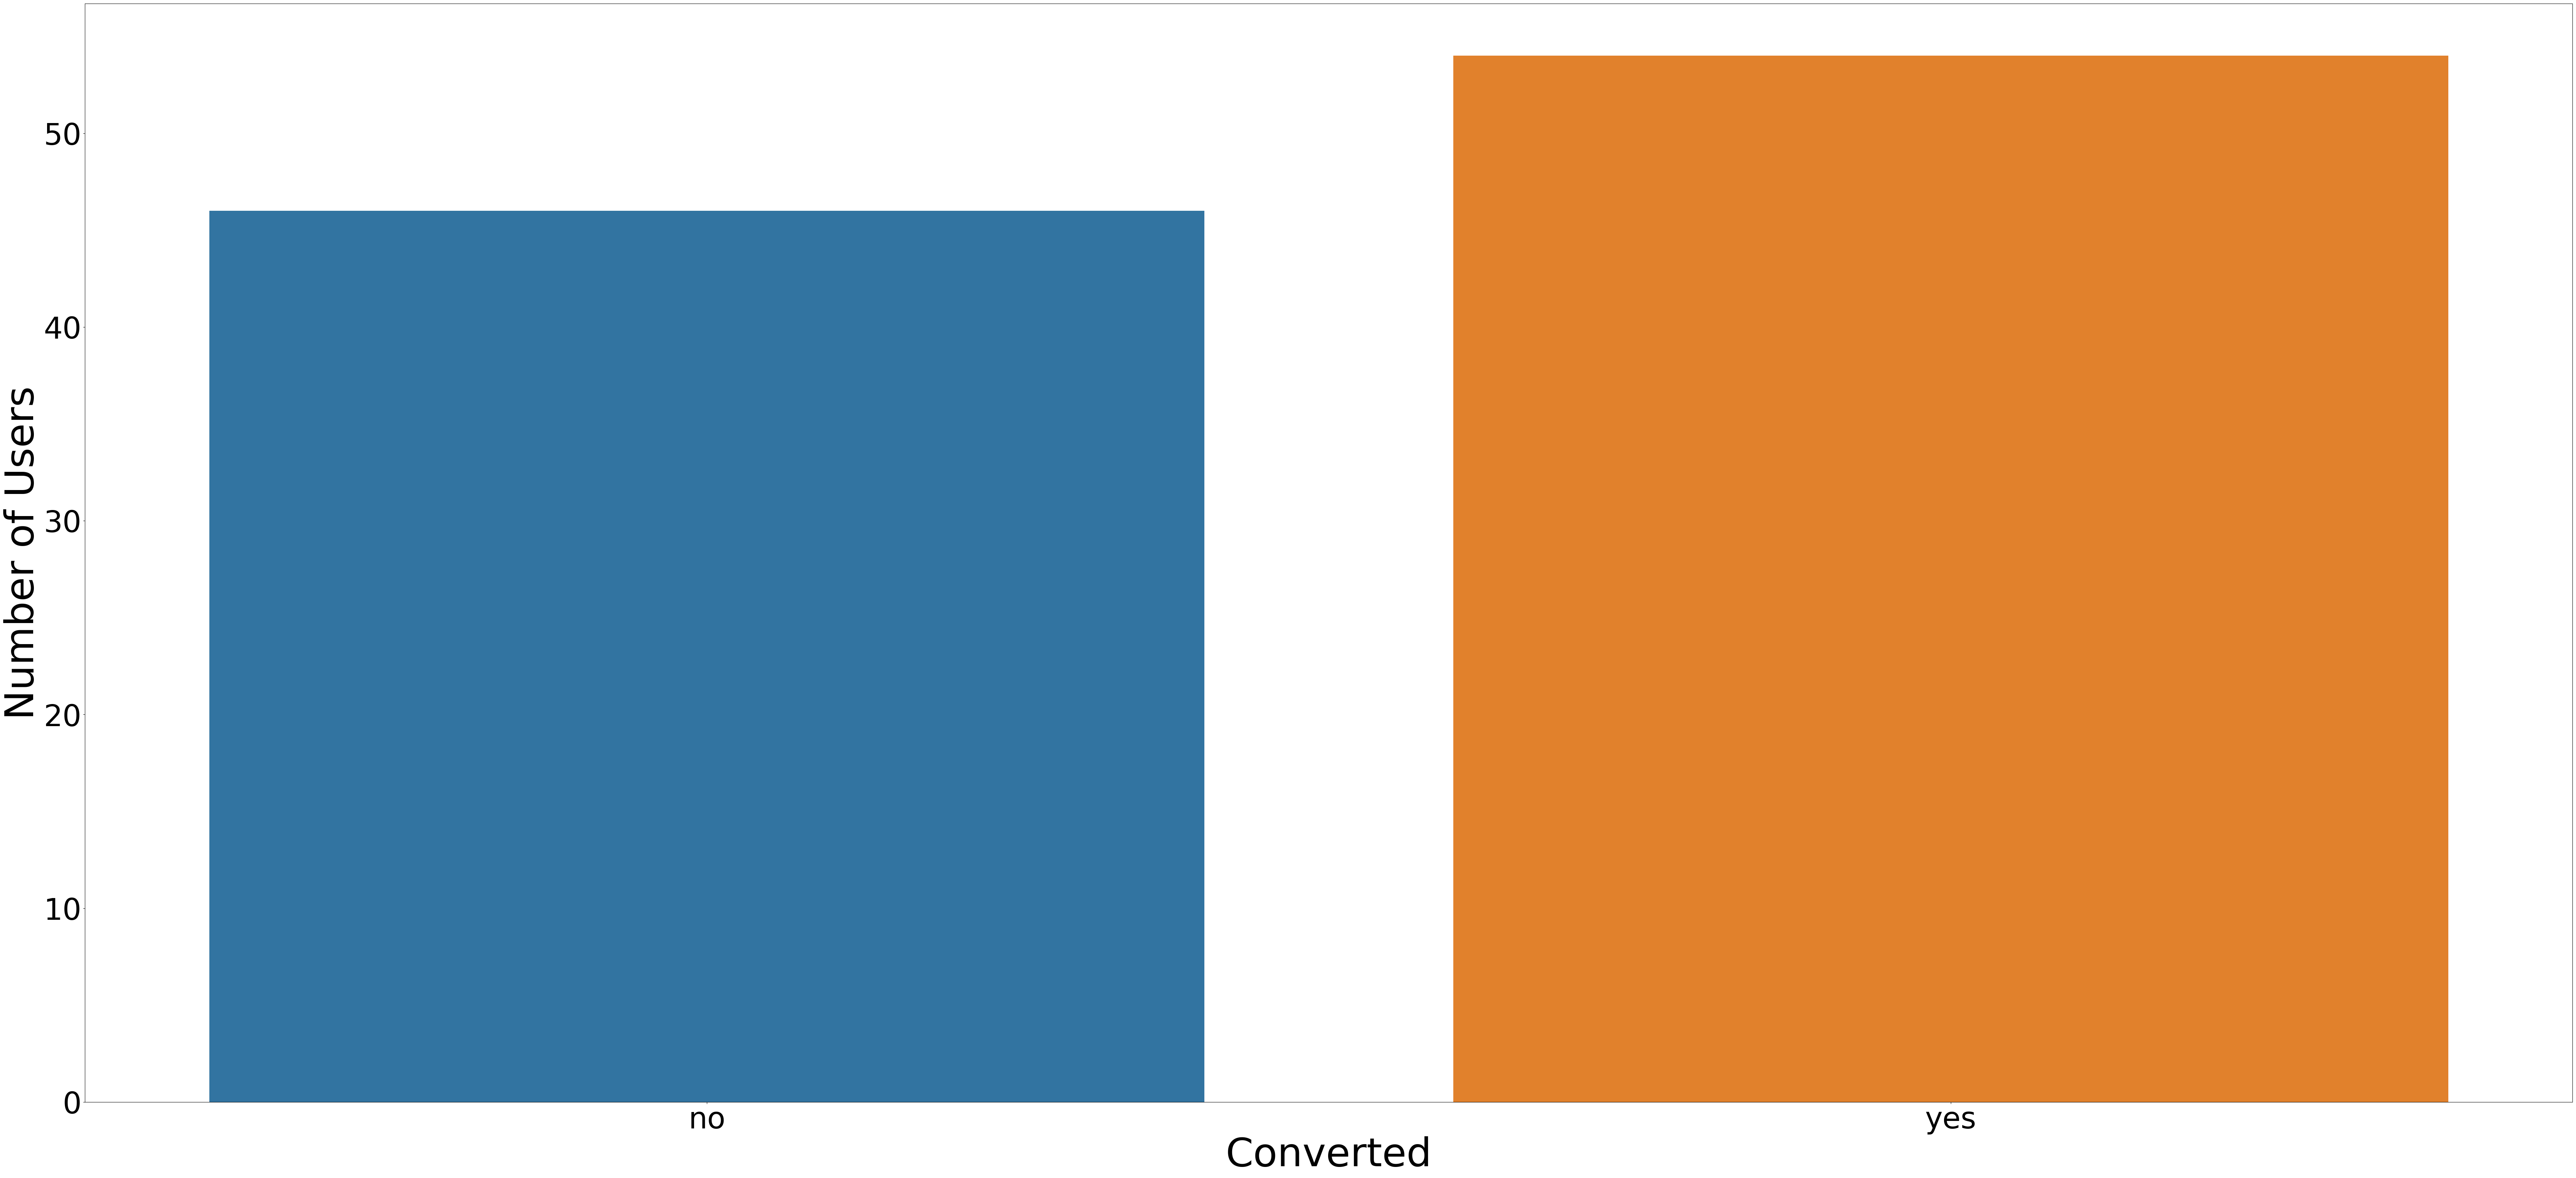

In [16]:
plt.figure(figsize=(90,40))
sns.countplot(data=df, x='converted');
plt.xlabel("Converted",fontsize=80)
plt.ylabel("Number of Users", fontsize=80)
plt.xticks(fontsize = 60);
plt.yticks(fontsize = 60);

#### Observations
*  There are more converted users then not. 
*  54 users converted and 46 not

In [17]:
df["language_preferred"].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

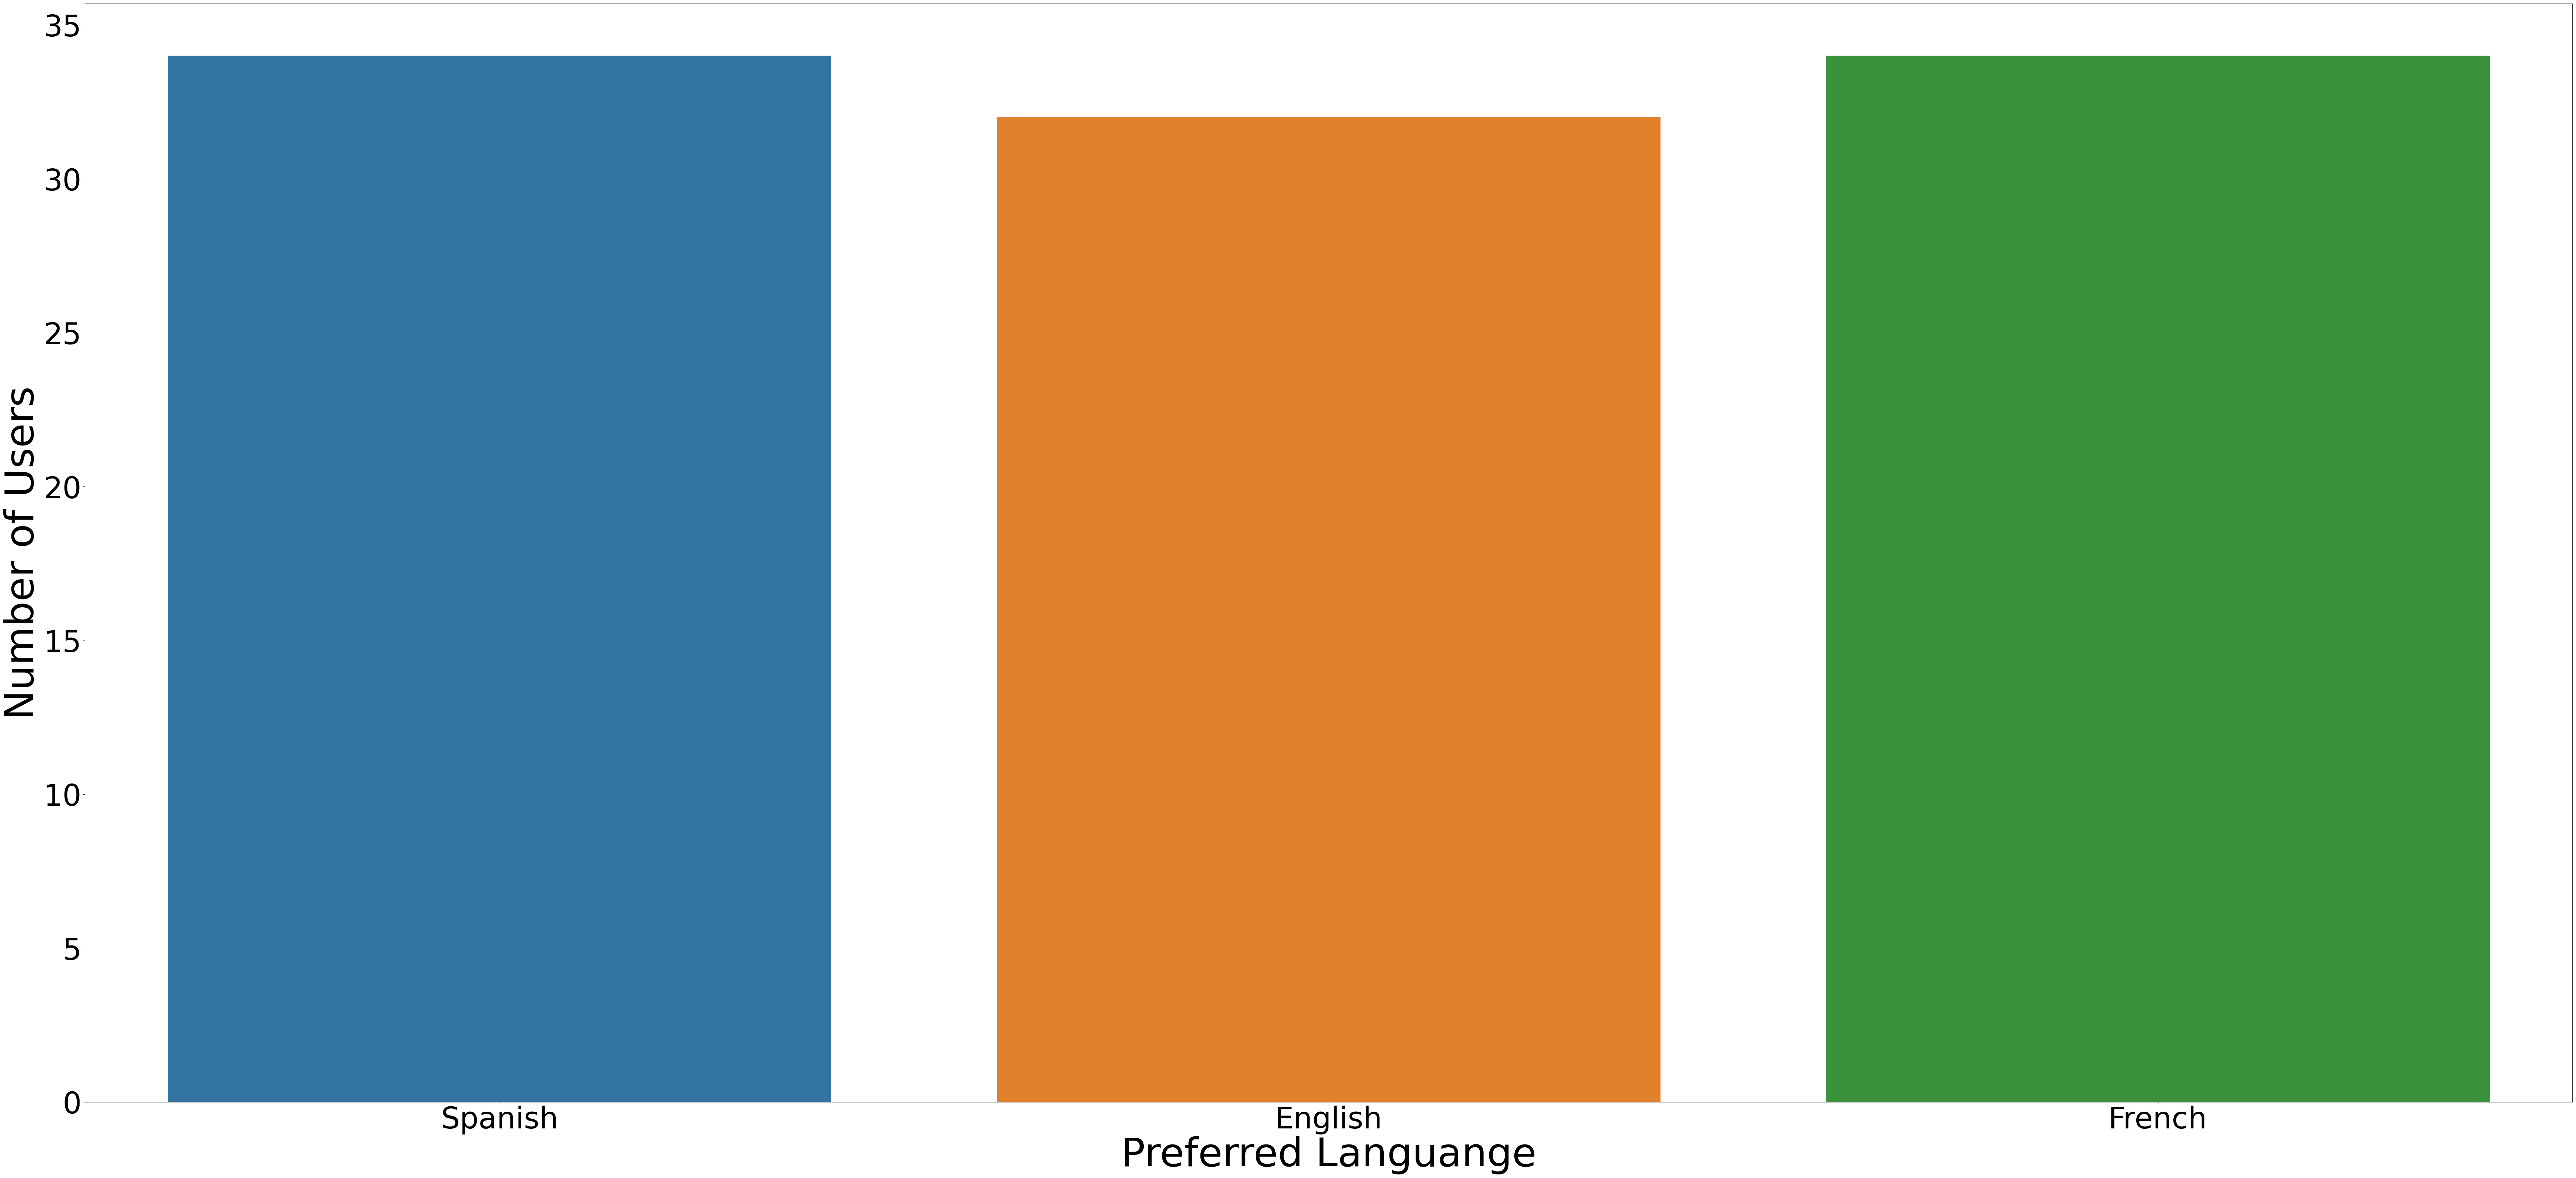

In [18]:
plt.figure(figsize=(90,40))
sns.countplot(data=df, x='language_preferred');
plt.xlabel("Preferred Languange",fontsize=80)
plt.ylabel("Number of Users", fontsize=80)
plt.xticks(fontsize = 60);
plt.yticks(fontsize = 60);

#### Observations
*  There are 3 preferred languages:  Spanish, French and English.
*  Users prefer Spanish and French more than English.
*  The number of users chosing Spanish and French are equal
*  English is the least preferred language, but that by much

In [19]:
time = round(df["time_spent_on_the_page"].mean(),2)
print ("The mean time spent on the landing pages are", time, "minutes")

The mean time spent on the landing pages are 5.38 minutes


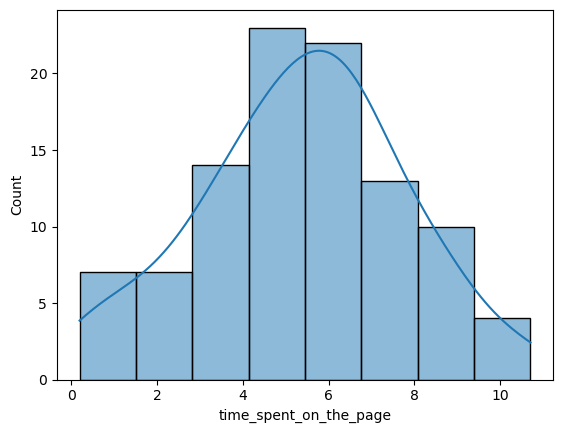

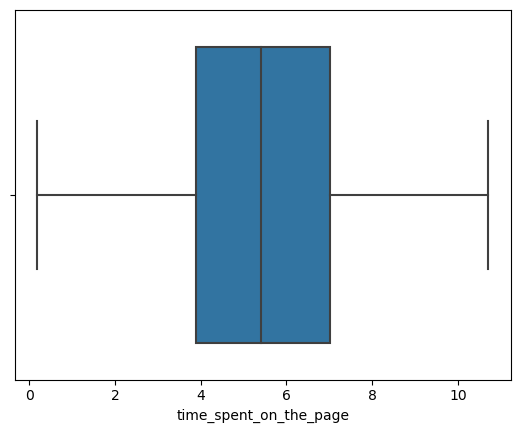

In [20]:
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.show()

sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### Observations
* The mean time spent on the landing pages are 5.38 minutes
* The distribution is normal
*  There are no outliers

### Bivariate Analysis

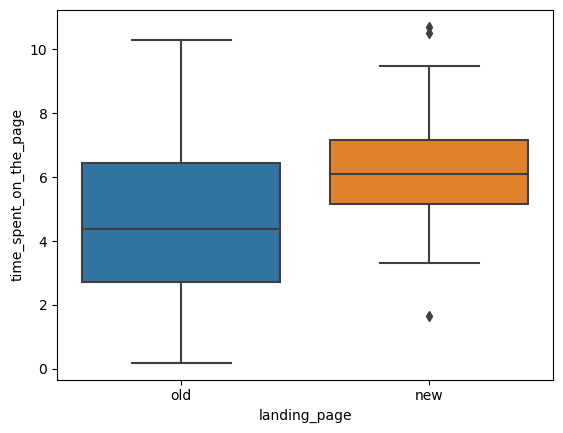

In [21]:
sns.boxplot(data=df, x= "landing_page",y = "time_spent_on_the_page");

#### Observations
*  The mean time spent on the new landing page is higher than the mean time spent on the old landing page
*  There are outliers for the time spent on the new landing page

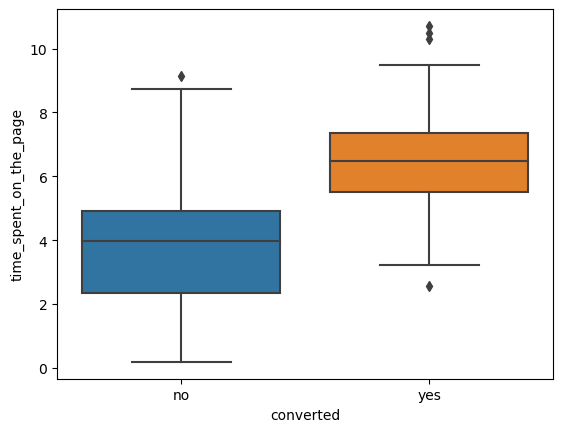

In [22]:
sns.boxplot(data=df, x= "converted",y = "time_spent_on_the_page");

#### Observations
*  There are more users converted from the new landing page, than on the old landing page.
*  The number of users converted in the upper 75% quartile of the new landing page is more than on the upper 25% quartile of the old landing page

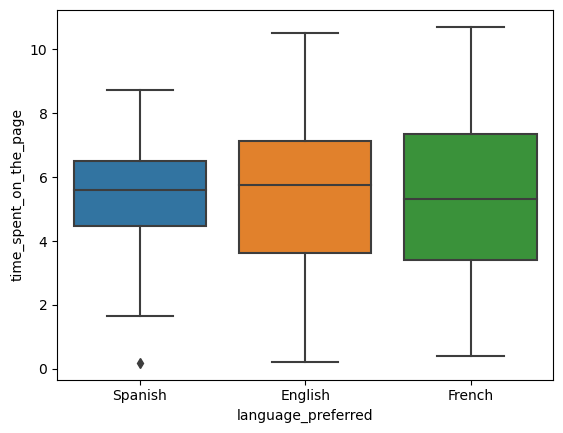

In [23]:
sns.boxplot(data=df, x= "language_preferred",y = "time_spent_on_the_page");

#### Observations
*  Spanish speaking users are more consistent on the time spent on the landing pages compared to English and French speaking users
*  English and French spends more time and equal amount of times on the landing pages, although the average time differs slightly with the average time for English being approx.  6 minutes and the average time for French users being approx. 5 minutes

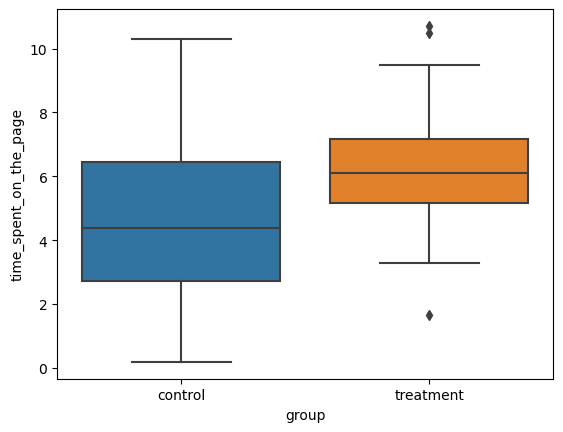

In [24]:
sns.boxplot(data=df, x= "group",y = "time_spent_on_the_page");

##### Observations
*  Users in the treatment group tend to spend more time on the landing pages.
*  The average time spent for users in the control group is approx 4.5 minutes and the average time for users in the treatment group is 6 minutes.
*  There are oultiers in the treatment group

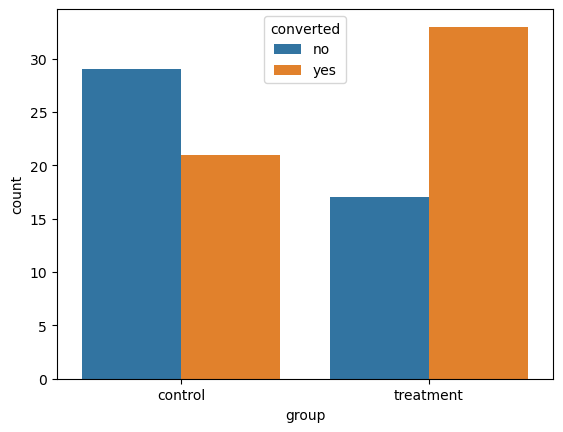

In [25]:
sns.countplot(data=df, x= "group",hue = "converted");

#### Observations
* There are more users converted in the treatment group than in the control group.
* There are approximately 20 users converted in the control group and 32 users converted in the treatment group

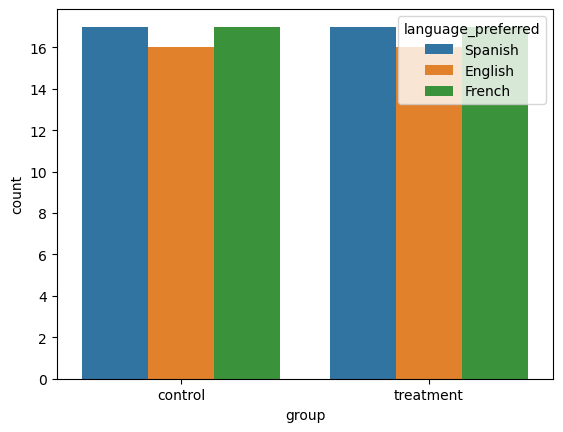

In [26]:
sns.countplot(data=df, x= "group",hue = "language_preferred");

In [27]:
df.groupby(["group","language_preferred"]).language_preferred.value_counts().reset_index()

,group,language_preferred,count
0,control,English,16
1,control,French,17
2,control,Spanish,17
3,treatment,English,16
4,treatment,French,17
5,treatment,Spanish,17


#### Observations
* The language preferred in each of the groups are the same:
    - English - 16 users
    - French - 17 users
    - Spanish - 17 users

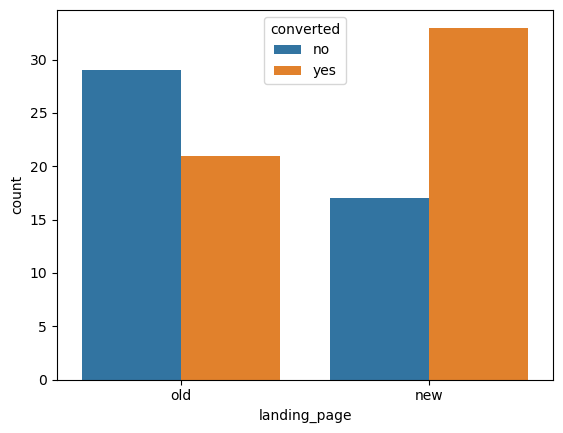

In [28]:
sns.countplot(data=df, x= "landing_page",hue = "converted");

#### Observatoins
*  Here we see similar results as for group and converted as the control group was given the old landing page and the treatment group weas given the new landing page.
*  There are more users converted in the new landing page than in the old landing page, approx. 32 and 20 respectively.

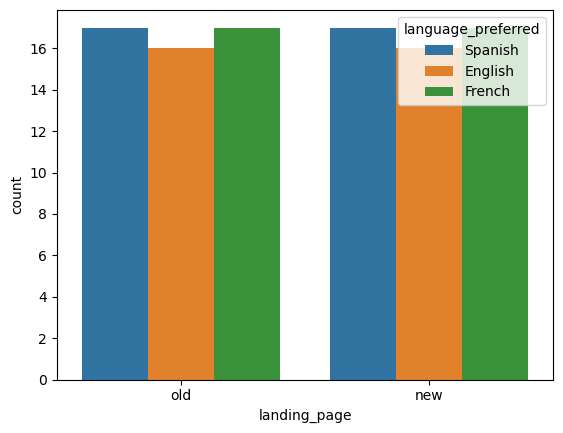

In [29]:
sns.countplot(data=df, x= "landing_page",hue = "language_preferred");

In [30]:
df.groupby(["landing_page","language_preferred"]).language_preferred.value_counts().reset_index()

,landing_page,language_preferred,count
0,new,English,16
1,new,French,17
2,new,Spanish,17
3,old,English,16
4,old,French,17
5,old,Spanish,17


<Figure size 1200x800 with 0 Axes>

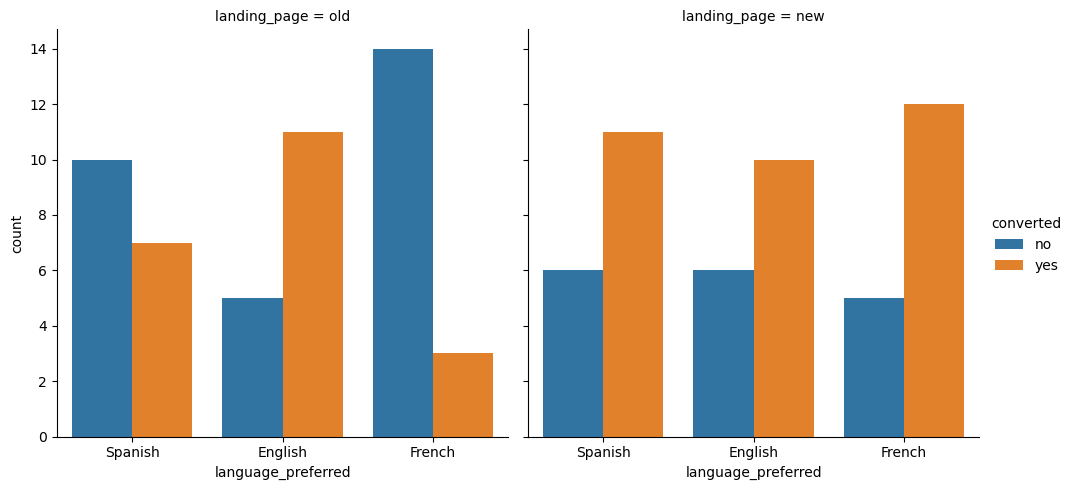

In [31]:
plt.figure(figsize=(12,8));
sns.catplot(x='language_preferred', hue="converted", data=df,
                estimator=sum, col='landing_page', kind="count", );

In [32]:
df.groupby(["landing_page","converted"]).language_preferred.value_counts().reset_index()

,landing_page,converted,language_preferred,count
0,new,no,English,6
1,new,no,Spanish,6
2,new,no,French,5
3,new,yes,French,12
4,new,yes,Spanish,11
5,new,yes,English,10
6,old,no,French,14
7,old,no,Spanish,10
8,old,no,English,5
9,old,yes,English,11


#### Observations
*  There are 16 English, 17 French and 17 Spansih preferred language users in each of the landing pages (old and new)
*  In the new landing page the French users were converted the most, whereas in the old landing page, the French users was converted the least.  In the old landing page 3 French users was converted, in the new landing page 12 French users was converted.
*  We see s similar pattern for the Spanish users where 7 users was converted in the old language page and 11 converted in the new landing page
*  However we see a decline in the number of users converted in the new language page for the English users.  There was 11 users converted in the old language page and 10 users converted in the new language page  

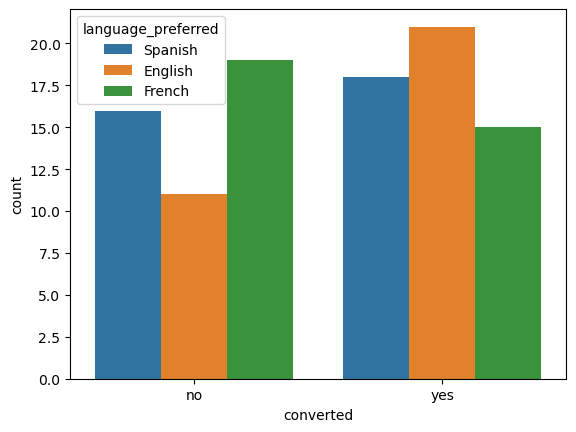

In [33]:
sns.countplot(data=df, x= "converted",hue = "language_preferred");

In [34]:
df.groupby(["converted","language_preferred"]).language_preferred.value_counts().reset_index()

,converted,language_preferred,count
0,no,English,11
1,no,French,19
2,no,Spanish,16
3,yes,English,21
4,yes,French,15
5,yes,Spanish,18


#### Observations
*  Overall there are more English users converted than French and Spanish.  
*  Overall there are 21 English users converted, 18 Spanish users converted and 15 French users converted

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

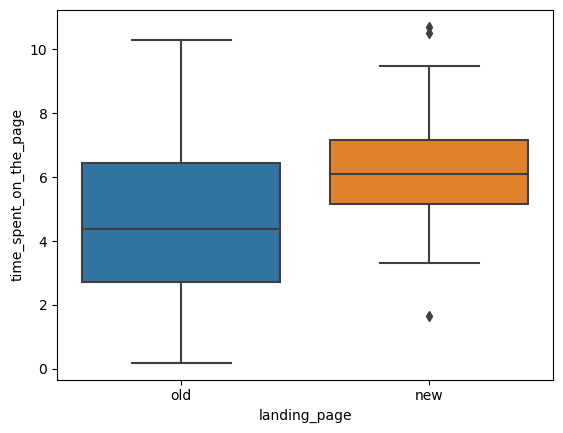

In [35]:
sns.boxplot(data=df, x="landing_page", y="time_spent_on_the_page");

##### Observations
*  we can see that users spend more time in the new landing page as compared to the old landing page

### Step 1: Define the null and alternate hypotheses

Let  $\mu$  be the mean time spent on the landing page of the E-News Company.

The null and alternative hypothesis can be defined as:

Null:
>$H_0:\mu_1=\mu_2$

The mean time spent in the old landing page is equal to the mean time spent in the new landing page

Alternative Hypothesis:
>$H_a:\mu_1<\mu_2$

The mean time spent in the old landing page is less than the mean time spent in the new landing page



### Step 2: Select Appropriate test

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time_spent_on_the_page is measured on a continuous scale.

*   Normally distributed population and Sample size > 30 - Yes, it is assumed that the population is normal and the sample size is 50 which is greater than 30.
*   Observations are from a simple random sample - Yes, the case study indicates that the users was randomply selected
*   Population standard deviation is known - No
*  We are comparing 2 independent samples 

We can use 2 sample independent T-test for this problem.

### Step 3: Decide the significance level

As indicated in the case study alpha:

$\alpha$ = 0.05%

### Step 4: Collect and prepare data

In [36]:
# We need to calcualte the std for the sample data and compare them to determine is we can assume the population std dev is equal

old_page = df[df["landing_page"] == "old"]
new_page = df[df["landing_page"] == "new"]

mean_old = old_page["time_spent_on_the_page"].mean()
mean_new = new_page["time_spent_on_the_page"].mean()
std_old = old_page["time_spent_on_the_page"].std()
std_new = new_page["time_spent_on_the_page"].std()
print ("The mean time spent in the old page is ", round(mean_old, 2), "minutes")
print ("The mean time spent in the new page is ", round(mean_new, 2), "minutes")
print ("The standard deviation for the old page is ", round(std_old, 2), "minutes")
print ("The standard deviation for the new page is ", round(std_new, 2), "minutes")

The mean time spent in the old page is  4.53 minutes
The mean time spent in the new page is  6.22 minutes
The standard deviation for the old page is  2.58 minutes
The standard deviation for the new page is  1.82 minutes


#### Observations
The standard deviations for the old and new pages are different.

Hence we are doing a 2 sample  independent T Test with unequal standard deviations

### Step 5: Calculate the p-value

In [37]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(old_page["time_spent_on_the_page"], new_page["time_spent_on_the_page"], equal_var = False, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


##### Obsevations
* As the p value is lower than alpha of 0.05 we reject the null hypothesis
*  There is not enough statistical evidence to say that the mean time spent  on both the old and new landing pages are the same.  The mean time spent on the new landing page is more than on the old landing page

### Step 6: Compare the p-value with $\alpha$

In [38]:
alpha = 0.05

if p_value  < alpha:
    print("We reject the null hypothesis as", round (p_value, 4), "is less than", alpha)
else:
     print("We accept the null hypothesis as", round (p_value, 4), "is greater than", alpha)

We reject the null hypothesis as 0.0001 is less than 0.05


### Step 7:  Draw inference

##### Obsevations
* As the p value is lower than alpha of 0.05 we reject the null hypothesis
*  There is not enough statistical evidence to say that the mean time spent  on both the old and new landing pages are the same.  The mean time spent on the new landing page is more than on the old landing page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [39]:
# storing the converted and not converted users from the old page in  seperate dataframes
converted_old_page = old_page[old_page["converted"]=="yes"].reset_index()
not_converted_old_page = old_page[old_page["converted"]=="no"].reset_index()

# storing the converted and not converted users from the new page in  seperate dataframes
converted_new_page = new_page[new_page["converted"]=="yes"].reset_index()
not_converted_new_page = new_page[new_page["converted"]=="no"].reset_index()

print("number of users converted in the old landing page is", converted_old_page.shape[0])
print("number of users converted in the new landing page is", converted_new_page.shape[0])

number of users converted in the old landing page is 21
number of users converted in the new landing page is 33


<Axes: xlabel='landing_page', ylabel='count'>

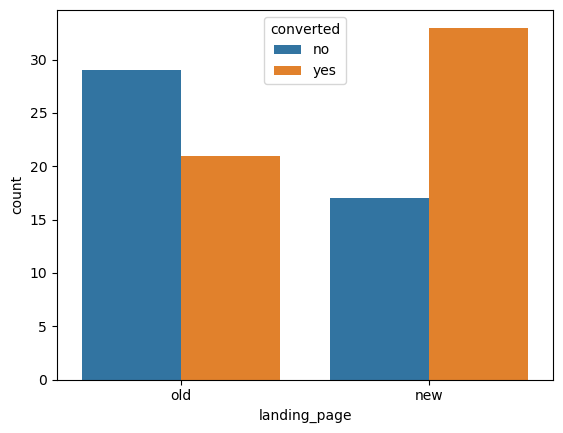

In [40]:
sns.countplot(data = df, x="landing_page", hue="converted")

#### Observations
*  There are more converted users in the new landing page than in the old landing page

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:p_1 = p_2$

against the alternate hypothesis

>$H_a:p_1 < p_2$

### Step 2: Select Appropriate test

This is a test on proportions, with 2 populations

We will use a 2 proportions Z Test


### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either converted or not-converted.
*   Random sampling from the population - Yes, the case study stated that it the experiemnt was dine using random sampling.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $

*  np and n(1-p) is greater than 10 for both samples

### Step 3: Decide the significance level

As indicated in the case study alpha:

$\alpha$ = 0.05%

### Step 4: Collect and prepare data

In [41]:
# finding the proportion of users converted for the old page
conversion_old = (old_page[(old_page["converted"]=="yes")].shape[0] / 50)
print ("The conversion rate for the old landing page is", conversion_old)

# finding the proportion of users converted for the new page
conversion_new = (new_page[(new_page["converted"]=="yes")].shape[0] / 50)
print ("The conversion rate for the new landing page is", conversion_new)


The conversion rate for the old landing page is 0.42
The conversion rate for the new landing page is 0.66


### Step 5: Calculate the p-value

In [42]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
converted_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs, alternative = "smaller")
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [43]:
alpha = 0.05

if p_value  < alpha:
    print("We reject the null hypothesis as", round (p_value, 4), "is less than", alpha)
else:
     print("We accept the null hypothesis as", round (p_value, 4), "is greater than", alpha)

We reject the null hypothesis as 0.008 is less than 0.05


### Step 7:  Draw inference
The p-value is less than 0.05, hence wwe reject the null hypothesis.  There is not enough statistical evidence to state that proportion of users who are converted for the old page is not equal to the proportion of users who are converted for the neew page.  The proportion of users who vist the new page and get converted is greater than the proportion of users who visit the old page and get converted 

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

<Axes: xlabel='converted', ylabel='count'>

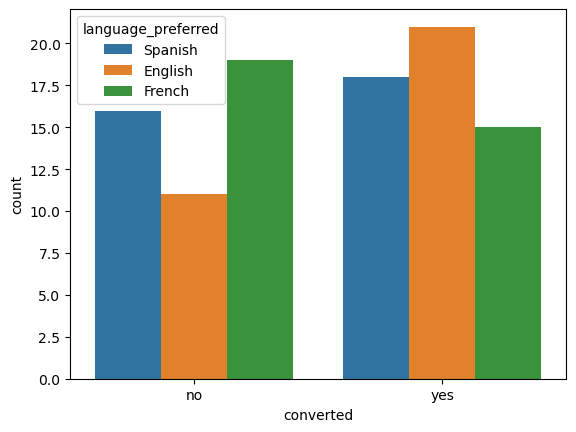

In [44]:
sns.countplot(data=df, x="converted", hue="language_preferred")

#### Observations

*  Users who preffer English has the highest number of conversions

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis:
>$H_0:$ conversion rate is independent of preferred language

against the alternate hypothesis
 
>$H_a:$ conversion rate is dependent of preferred language

### Step 2: Select Appropriate test

This is a test of independence for converted and language_preferred.  We can use the Chi-Square Test for Independence



### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, the case study indicateds that the experiment was done using random sampling.

### Step 3: Decide the significance level

As indicated in the case study alpha:

$\alpha$ = 0.05%

### Step 4: Collect and prepare data

In [45]:
# creating contingency table showing the distribution of conversion and preferred language

contingency_table = pd.crosstab(df['converted'],df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [46]:
from scipy.stats import chi2_contingency   # For Chi-Square test

# use chi2_contingency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', pval)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [47]:
alpha = 0.05

if pval  < alpha:
    print("We reject the null hypothesis as", round (pval, 4), "is less than", alpha)
else:
     print("We accept the null hypothesis as", round (pval, 4), "is greater than", alpha)

We accept the null hypothesis as 0.213 is greater than 0.05


### Step 7:  Draw inference
The p-value is greater than 0.05, hence we connot reject the null hypothesis.  There is  enough statistical evidence to state that conversion rate is independent of preferred language 

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

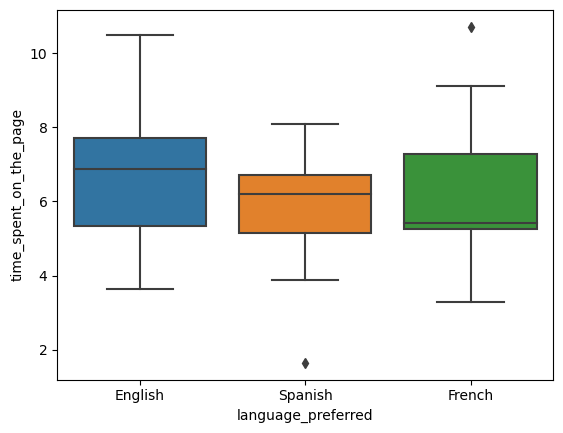

In [48]:
# plotting the language_preferred vs time_spent_on_the_page

sns.boxplot(data=new_page, x="language_preferred", y="time_spent_on_the_page");

#### Observations

* On average users who prefer English spends more time on the page
* On average users who prefer french spends the least amount of time

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis:
>$H_0:$ The time spent on the new page is equal for the different preferred languages 

against the alternate hypothesis
 
>$H_a:$ time spent on the new page for at least one of the preferred languages is different

### We can run the Shapiro-Wilk’s test to determine if the population is normally distributed

We will test the null hypothesis

>$H_0:$ Time spent on the new landing page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new landing page does not follow a normal distribution

In [49]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


#### Observations

The p-value is very large, larger than 0.05, hence we fail to reject the null hypothesis.  There is enough statistical evidence to suggest that time spent on the new landing page follows a normal distribution

### We can run the Levene’s test to determine if the population variance are equal

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [50]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new_page["language_preferred"] == "English", 
                                  new_page["language_preferred"] == "Spanish", new_page["language_preferred"] == "French")
# find the p-value
print('The p-value is', p_value)

The p-value is 0.9710222644330399


#### Observations

*  The p-value is bigger than 0.05, hence we cannot reject the null hypothesis.  There is enough statistical evidence to suggest that the population variances are equal

### Step 2: Select Appropriate test

This is a test of 3 different means.  We can use the one way ANOVA


### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, the case study stated that it the experiemnt was done using random sampling.  
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Step 3: Decide the significance level

As indicated in the case study alpha:

$\alpha$ = 0.05%

### Step 4: Collect and prepare data

In [51]:
# creating separate dataframes for English as the preferred Language

#english = new_page[new_page["language_preferred"]=="English"].reset_index()
#english

In [52]:
# creating separate dataframes for Spanish as the preferred Language

#spanish = new_page[new_page["language_preferred"]=="Spanish"].reset_index()
#spanish

In [53]:
# creating separate dataframes for Spanish as the preferred Language

#french = new_page[new_page["language_preferred"]=="French"].reset_index()
#french

### Step 5: Calculate the p-value

In [54]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_page.loc[new_page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new_page.loc[new_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                             new_page.loc[new_page['language_preferred'] == 'French', 'time_spent_on_the_page'])
    

# find the p-value
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [55]:
alpha = 0.05

if p_value  < alpha:
    print("We reject the null hypothesis as", round (p_value, 4), "is less than", alpha)
else:
     print("We accept the null hypothesis as", round (p_value, 4), "is greater than", alpha)

We accept the null hypothesis as 0.432 is greater than 0.05


### Step 7:  Draw inference
The p-value is greater than 0.05, hence we connot reject the null hypothesis.  There is  enough statistical evidence to state that time spent on the landing page is the same for the different preferred languages

## Conclusion and Business Recommendations

1.  Overall there are more converted users than not converted users.  54 users were converted, 46 users not converted
1.  Users prefer Spansih and French more (34 users each).  Users who had English as the preferred language was less, but not by much, 32 users 
1.  The mean time spent on the landing pages are 5.38 minutes
1.  The mean time spent on the new landing page is higher than the mean time spent on the old landing page
1.  There are more users converted from the new landing page, than on the old landing page.
1.  Spanish speaking users are more consistent on the time spent on the landing pages compared to English and French speaking users
1.  The range of time spent on the landing page by English and French users are almost the same. 
1.  Users in the treatment group (new landing page) tend to spend more time on the landing pages.The average time spent for users in the control group (old landing page) is approx 4.5 minutes and the average time for users in the treatment group is 6 minutes.
1.  There are more users converted in the treatment group (20 users) than in the control group (32 users). 
1.  Overall there are more English users converted than French and Spanish.  
1.  Overall there are 21 English users converted, 18 Spanish users converted and 15 French users converted
1.  In the new landing page the French users were converted the most, whereas in the old landing page, the French users was converted the least.  In the old landing page 3 French users was converted, in the new landing page 12 French users was converted.
1.  We see s similar pattern for the Spanish users where 7 users was converted in the old language page and 11 converted in the new landing page
1.  However we see a decline in the number of users converted in the new language page for the English users.  There was 11 users converted in the old language page and 10 users converted in the new language page  


1.  There is not enough statistical evidence to say that the mean time spent  on both the old and new landing pages are the same.  The mean time spent on the new landing page is more than on the old landing page
1.  There is not enough statistical evidence to state that proportion of users who are converted for the old page is not equal to the proportion of users who are converted for the neew page.  The proportion of users who vist the new page and get converted is greater than the proportion of users who visit the old page and get converted 
1.  There is  enough statistical evidence to state that time spent on the landing page is the same for the different preferred languages
1.  There is  enough statistical evidence to state that conversion rate is independent of preferred language 

### Recommendations
1.  Statistically speaking, the time spent on the landing pages are the same, however the conversion rates for Spanish and French preferred users increased considerably in the new landing page.  Further investigations should be done to see how the English landing page can be redesigned to achieve similar results.
1.  Although there is not sgtatistical evidence to state that the conversion rate is independent of the prefered language, further analysis can be done on the old and new landing pages seperately, as there is a considerable difference between the conversion rates in the new landing page compared to the old lanading page





